By: Raul Boekhoudt


# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available



## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

f = 'data/task_1/lm_scores/'
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [3]:
# A

"""
This is a small explanation of the approach, a more straight forward explanation is in section "B"

Giving a look at the data we can quickly see that the LM didnt always answer A, B or so in just a single letter,
but rather went about it in different ways like:

Answer: A
"abelian group, so the answer is D"

However looking at all the data we can see a pattern, the last character (excluding exclamations like ") is always
the answer, and if it isnt then its lowercase (this happens when it isnt sure of the answer, so we can still map it)
In the case it isnt sure we can put a value like U that we know it will always be counted as wrong (although its
appreciated that it answers that its not sure over an incorrect answer)

In the case that results from different LM's are going to be added to the current dataset I wouldnt apply this method to
get the correct value for the answer due to it not being neccesarily true for all LM's, but in the case
of the 3 LM's that answered the question its a consistent
"""

print("Before cleaning")
print(df_x.head())
print("\n\n")



data_temp = [df_x, df_y, df_z]

for i in range(3):
    # some elements lack an answer thus filled in as wrong
    data_temp[i] = data_temp[i].fillna('V')

    data_temp[i]['cleaned_result'] = data_temp[i]['result']


    # case in which it ends with "

    data_temp[i]['longer_ans'] = data_temp[i]['cleaned_result'].str.endswith('"')

    data_temp[i]['modified_result'] = data_temp[i]['cleaned_result']
    data_temp[i].loc[data_temp[i]['longer_ans']==True, 'modified_result'] = data_temp[i].loc[data_temp[i]['longer_ans']==True, 'cleaned_result'].str[:-1]

    # no longer needed and it bothers me
    data_temp[i] = data_temp[i].drop('modified_result', axis=1)
    data_temp[i] = data_temp[i].drop('longer_ans', axis=1)



    # case in which it ends with a space

    data_temp[i]['spaced_ans'] = data_temp[i]['cleaned_result'].str.endswith(' ')

    data_temp[i].loc[data_temp[i]['spaced_ans']==True, 'cleaned_result'] = data_temp[i].loc[data_temp[i]['spaced_ans']==True, 'result'].str[:-1]

    # no longer needed and it bothers me
    data_temp[i] = data_temp[i].drop('spaced_ans', axis=1)



    # case where it ends with lowercase

    data_temp[i]['unsure_ans'] = data_temp[i]['cleaned_result'].str.match(r'.*[a-z]$')
    data_temp[i].loc[data_temp[i]['unsure_ans']==True, 'cleaned_result'] = "U"

    data_temp[i] = data_temp[i].drop('unsure_ans', axis=1)



    # now we only take the last character and set it as the result:

    data_temp[i]['slightly_longer_ans'] = data_temp[i]['cleaned_result'].str.len()>1
    data_temp[i].loc[data_temp[i]['slightly_longer_ans']==True, 'cleaned_result'] = data_temp[i].loc[data_temp[i]['slightly_longer_ans']==True, 'result'].str[-1]
    data_temp[i] = data_temp[i].drop('slightly_longer_ans', axis=1)




df_x = data_temp[0]
df_y = data_temp[1]
df_z = data_temp[2]

print("After cleaning")
print(df_x.head())


Before cleaning
   question_id     result
0            0          B
1            1          C
2            2         D 
3            3         B 
4            4  Answer: B



After cleaning
   question_id     result cleaned_result
0            0          B              B
1            1          C              C
2            2         D               D
3            3         B               B
4            4  Answer: B              B


In [4]:
# B it had the Discuss marl at the top but not here

"""
I already covered the general of what unexpected formats can be seen above, but in short although most of the time
it answers consicely with just the letter, sometimes it can answer in other wasy such as:
    - Adding a space at the end after the letter
    - Specifying "Answer: " before the letter
    - putting an explanation inside "" with the final character always being the letter as the answer
    - saying its unsure of the answer
    - leaves it completely blank (Nan)

The ways they are handled are the following (in the same order that it was state before):
    - Deleting the space at the end and jsut leaving the letter
    - Only taking the last character of the answer
    - deleting the last " and also only taking the last character of the answer
    - detecting that the last letter is lower case and marking the answer as U to be show its unsure
    - detecting its blank and filling it in with a V to show it just didnt answer it

the reason why we dont fill in the unsure U and the blank V with the same, is because the unsure answer,
although wrong, is better than a completely wrong answer and so we could use this information later on


In the case that results from different LM's are going to be added to the current dataset I wouldnt apply this method to
get the correct value for the answer due to it not being neccesarily true for all LM's, but in the case
of the 3 LM's that answered the question its consistent


AFTER looking at the next part (1.3) we decided to put the changes in a new column called "cleaned_result" so we can
use the results column as it is for that part
"""


'\nI already covered the general of what unexpected formats can be seen above, but in short although most of the time\nit answers consicely with just the letter, sometimes it can answer in other wasy such as:\n    - Adding a space at the end after the letter\n    - Specifying "Answer: " before the letter\n    - putting an explanation inside "" with the final character always being the letter as the answer\n    - saying its unsure of the answer\n    - leaves it completely blank (Nan)\n\nThe ways they are handled are the following (in the same order that it was state before):\n    - Deleting the space at the end and jsut leaving the letter\n    - Only taking the last character of the answer\n    - deleting the last " and also only taking the last character of the answer\n    - detecting that the last letter is lower case and marking the answer as U to be show its unsure\n    - detecting its blank and filling it in with a V to show it just didnt answer it\n\nthe reason why we dont fill in

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [ ]:
#A & B

"""
We actually overdid it a bit on the last part and think it covers this section as well, so to complete this section we
will make another column called "recleaned_ans"
"""

def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

data_temp = [df_x, df_y, df_z]

for i in range(3):

    """
    The idea here is to have "B" (which symbolizes blank or unfilled answer in the previous exer) to symbolize
    the answers that we woulndt have taken into account in this section 
    """
    
    data_temp[i]['recleaned_ans'] = data_temp[i]['result']

    data_temp[i]['unsure_ans'] = ( data_temp[i]['recleaned_ans'].isin(["None of the above"]) | data_temp[i]['recleaned_ans'].isin(["Not Sure"]) )
    data_temp[i].loc[data_temp[i]['unsure_ans']==True, 'recleaned_ans'] = "U"
    data_temp[i] = data_temp[i].drop('unsure_ans', axis=1)


    data_temp[i]['less_than_10'] = data_temp[i]['result'].str.len() < 10
    data_temp[i].loc[data_temp[i]['less_than_10']==True, 'recleaned_ans'] = data_temp[i].loc[data_temp[i]['less_than_10']==True, 'result']

    data_temp[i].loc[data_temp[i]['less_than_10']==False, 'recleaned_ans'] = "V"

    data_temp[i] = data_temp[i].drop('less_than_10', axis=1)

    # now using the clean_answer function
    data_temp[i]['recleaned_ans'] =  data_temp[i]['recleaned_ans'].apply(lambda x: clean_answer(x, "Answer: ")) # stating ans
    data_temp[i]['recleaned_ans'] =  data_temp[i]['recleaned_ans'].apply(lambda x: clean_answer(x, " ")) # only an extra space
    # order is important in these 2 operations, do not change



df_x = data_temp[0]
df_y = data_temp[1]
df_z = data_temp[2]

print("After cleaning (again)")
print(df_x.head(10))


After cleaning (again)
   question_id     result cleaned_result recleaned_ans
0            0          B              B             B
1            1          C              C             C
2            2         D               D             D
3            3         B               B             B
4            4  Answer: B              B             B
5            5          A              A             A
6            6          A              A             A
7            7  Answer: D              D             D
8            8          A              A             A
9            9  Answer: C              C             C


C. /Discuss:/

This method ensures the data is cleaned properly, however the method i used in the previous version also manages this and
gets more information out of this particualr dataset, however if i were to add more datasets to this analysis I would
go with the solution seen in this section since its more robust for dealing with more conditions and might lead to more
robust behaviour of the output

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [7]:
# A

unsureness_advantage = 0


merged_df_x = pd.merge(
    df_x[['question_id', 'cleaned_result']], # only have these columns from this dataframe
    df_test[['question_id', 'question', 'answer', 'subject']],
    on='question_id',
    how='inner'
)

# we count each answer that matches as a +1 in their score and each that is unsure a variable (0 right now,
# but this can be changed to give some advantage to those do not spreed answers twhen they arent sure)
merged_df_x['score'] = 0
merged_df_x.loc[merged_df_x['cleaned_result'] == merged_df_x['answer'],'score'] = 1
merged_df_x.loc[merged_df_x['cleaned_result'] == "U",'score'] = unsureness_advantage # in case it isnt sure

print(merged_df_x.head())



# and we repeat this process with the rest of the datasets to compare them to the test



merged_df_y = pd.merge(
    df_y[['question_id', 'cleaned_result']], # only have these columns from this dataframe
    df_test[['question_id', 'question', 'answer', 'subject']],
    on='question_id',
    how='inner'
)

# we count each answer that matches as a +1 in their score and each that is unsure a variable (0 right now,
# but this can be changed to give some advantage to those do not spreed answers twhen they arent sure)
merged_df_y['score'] = 0
merged_df_y.loc[merged_df_y['cleaned_result'] == merged_df_y['answer'],'score'] = 1
merged_df_y.loc[merged_df_y['cleaned_result'] == "U",'score'] = unsureness_advantage



merged_df_z = pd.merge(
    df_z[['question_id', 'cleaned_result']], # only have these columns from this dataframe
    df_test[['question_id', 'question', 'answer', 'subject']],
    on='question_id',
    how='inner'
)

# we count each answer that matches as a +1 in their score and each that is unsure a variable (0 right now,
# but this can be changed to give some advantage to those do not spreed answers twhen they arent sure)
merged_df_z['score'] = 0
merged_df_z.loc[merged_df_z['cleaned_result'] == merged_df_z['answer'],'score'] = 1
merged_df_z.loc[merged_df_z['cleaned_result'] == "U",'score'] = unsureness_advantage




   question_id cleaned_result  \
0            0              B   
1            1              C   
2            2              D   
3            3              B   
4            4              B   

                                            question answer           subject  \
0  Find the degree for the given field extension ...      B  abstract algebra   
1  Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...      C  abstract algebra   
2  Find all zeros in the indicated finite field o...      D  abstract algebra   
3  Statement 1 | A factor group of a non-Abelian ...      B  abstract algebra   
4  Find the product of the given polynomials in t...      B  abstract algebra   

   score  
0      1  
1      1  
2      1  
3      1  
4      1  


In [8]:
# B

merged_df_x['correct'] = False
merged_df_x.loc[merged_df_x['cleaned_result'] == merged_df_x['answer'],'correct'] = True

merged_df_y['correct'] = False
merged_df_y.loc[merged_df_y['cleaned_result'] == merged_df_y['answer'],'correct'] = True

merged_df_z['correct'] = False
merged_df_z.loc[merged_df_z['cleaned_result'] == merged_df_z['answer'],'correct'] = True


# printing results of all datasets

print("mean of X: ", merged_df_x['score'].mean() ) 
print("mean of Y: ", merged_df_y['score'].mean() ) 
print("mean of Z: ", merged_df_z['score'].mean() ) 


mean of X:  0.7505402679729146
mean of Y:  0.7297181284876234
mean of Z:  0.634346046110752


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [9]:
#A

def balance_measure(datasets, percentage=0.05):
    subjects = merged_df_x['subject'].unique()


    subject_df = pd.DataFrame(columns=['subject', 'X', 'Y', 'Z'])

    for subject in subjects:
        x = datasets[0].loc[(datasets[0]['subject'] == subject) & (datasets[0]['cleaned_result'] != "V"), 'subject'].count()
        y = datasets[1].loc[(datasets[1]['subject'] == subject) & (datasets[1]['cleaned_result'] != "V"), 'subject'].count()
        z = datasets[2].loc[(datasets[2]['subject'] == subject) & (datasets[2]['cleaned_result'] != "V"), 'subject'].count()

        min = "x"
        # find minimun
        if x <= y and x <= z:
            min = "x"
        if y <= x and y <= z:
            min = "y"
        if z <= x and z <= y:
            min = "z"

        # find if diff from min to others is more than 10%

        val = [0,0,0]

        if min == "x":
            val[0] = 0
            val[1] = (y-x)/x
            val[2] = (z-x)/x
        if min == "y":
            val[0] = (x-y)/y
            val[1] = 0
            val[2] = (z-y)/y
        if min == "z":
            val[0] = (x-z)/z
            val[1] = (y-z)/z
            val[2] = 0

        subject_df.loc[len(subject_df)] = [subject, val[0], val[1], val[2]]

    result = subject_df.loc[(subject_df['X'] >= percentage) | (subject_df['Y'] >= percentage) | (subject_df['Z'] >= percentage)]
    result.reset_index(drop=True, inplace=True)

    return result

datasets = [merged_df_x, merged_df_y, merged_df_z]

balance_measure(datasets)

,subject,X,Y,Z
0,college chemistry,0.053763,0.075269,0.000000
1,computer security,0.031579,0.052632,0.000000
2,formal logic,0.000000,0.126126,0.099099
3,logical fallacies,0.115942,0.000000,0.144928
4,moral disputes,0.266917,0.154135,0.000000
5,moral scenarios,0.000000,0.170895,0.101469


In [10]:
#B

"""
For this balancing method we will look at the subjects that we got in the last part and simply make sure the
percentages are the same by getting rid first of questions that are not in all of them until the difference
is the same

we can check anytime how balance the datasets are just by using the function from above
"""

# go subject by subject
# get all question_ids that arent in all 3 and delete them from all that are bigger then 0


datasets = [merged_df_x, merged_df_y, merged_df_z]

subjects = balance_measure(datasets)

for i in range(len(subjects)):
    subject = subjects.loc[i, 'subject']
    #print(subject)
    values = [subjects.loc[i]['X'], subjects.loc[i]['Y'], subjects.loc[i]['Z']]
    #print(values)

    ids_biggers = []
    ids_smallest = []
    small_id = 0

    # here we get all the question ids from the subject and check which are in which set
    for j in range(len(datasets)):

        if values[j] == 0.0:
            small_id = j
            ids_smallest.extend(datasets[j].loc[datasets[j]['subject'] == subject]['question_id'].tolist())
        else:
            ids_biggers.extend(datasets[j].loc[datasets[j]['subject'] == subject]['question_id'].tolist())

    # deleting repeated ids
    ids_biggers = list(set(ids_biggers))
    

    ids_to_remove = []
    for j in range(len(ids_biggers)):
        if ids_biggers[j] not in ids_smallest:
            ids_to_remove.append(ids_biggers[j])

    #print(ids_to_remove)

    # from here we check what questions are inside the smallest dataset, and if they arent there we deleted it
    # after checking all of the 3 datasets n times we check if the percentages are below a certain treshhold
    # to know if we should stop


    n = 2 # to not check every single step since it can get expensive
    count = 0
    alpha = 0.03 # reduce from 10% to 3% of maximun difference
    stop = False
    elements = ["X", "Y", "Z"] # this is just here to make the code nicer
    while not stop:
        count += 1

        # delete step
        if count +1 >= len(ids_to_remove):
            stop = True
            continue

        if count-1 < len(ids_to_remove):
            row_to_drop = ids_to_remove[count-1]
            for k in range(len(datasets)-1):
                datasets[(small_id + k+1)%len(datasets)] = datasets[(small_id + k+1)%len(datasets)][datasets[(small_id + k+1)%len(datasets)]['question_id'] != row_to_drop]
            #print(len(datasets[0].loc[datasets[0]['subject'] == subject]))
            #print(len(datasets[1].loc[datasets[1]['subject'] == subject]))
            #print(len(datasets[2].loc[datasets[2]['subject'] == subject]))
            
        

        # check step
        if count % n == 0:
            balance = balance_measure(datasets)

            if subject not in balance['subject'].values:
                stop = True
                continue

            # check is a counter that is only increased if the dataset has reached tolerance
            check = 0
            for j in range(len(datasets)):
                if balance.loc[balance['subject'] == subject][elements[j]].tolist()[0] < alpha:
                    check += 1

            
            if check == len(datasets):
                stop = True
    




In [11]:
#C

# checking if there are nay unblanaced datasets, if not then should be empty
balance_measure(datasets, 0)

# printing results of all datasets

merged_df_x = datasets[0]
merged_df_y = datasets[1]
merged_df_z = datasets[2]

print("mean of X: ", merged_df_x['score'].mean() ) 
print("mean of Y: ", merged_df_y['score'].mean() ) 
print("mean of Z: ", merged_df_z['score'].mean() ) 



#printing balance of all datasets:
print()
print(balance_measure(datasets, 0))

mean of X:  0.7506885055805189
mean of Y:  0.7298474945533769
mean of Z:  0.634383621315522

                                subject         X         Y         Z
0                      abstract algebra  0.000000  0.000000  0.000000
1                               anatomy  0.000000  0.015267  0.000000
2                             astronomy  0.006757  0.020270  0.000000
3                       business ethics  0.010204  0.010204  0.000000
4                    clinical knowledge  0.007692  0.011538  0.000000
5                       college biology  0.007194  0.021583  0.000000
6                     college chemistry  0.053763  0.075269  0.000000
7              college computer science  0.010101  0.010101  0.000000
8                   college mathematics  0.020619  0.030928  0.000000
9                      college medicine  0.029940  0.023952  0.000000
10                      college physics  0.009901  0.000000  0.000000
11                    computer security  0.031579  0.052632  0.0000

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [12]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

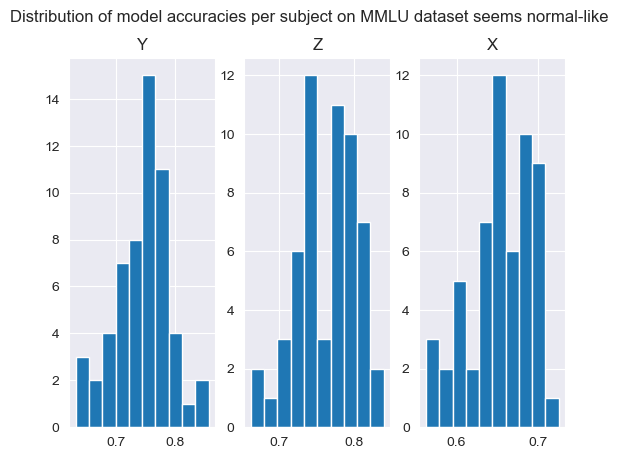

Metrics computed on MMLU Dataset for each model based on the model's accuracy per subject:
        mean       std
X  0.743478  0.045930
Y  0.763545  0.039684
Z  0.654388  0.038602
General accuracy on the MMLU dataset for each model without separating questions into subjects:
    Accuracy  95% CI Low  95% CI High
X  0.743588    0.735571     0.751482
Y  0.761542    0.753712     0.769242
Z  0.655951    0.647261     0.664563
General accuracy on the other dataset for each model:
    Accuracy  95% CI Low  95% CI High
X  0.787976    0.774555     0.800947
Y  0.720936    0.706297     0.735232
Z  0.671721    0.656447     0.686728


In [13]:
from scipy.stats import binomtest

#A
# Computing the accuracy of the models on the mmlu dataset per subject
models = df_mmlu['model_name'].unique()
subjects = df_mmlu['subject'].unique()
mmlu_model_subject_accuracy_df = pd.DataFrame(np.zeros((len(models), len(subjects))), index=models, columns=subjects)

for model_name in models:
    model_related_mmlu = df_mmlu[df_mmlu['model_name'] == model_name]
    for subject in subjects:
        mmlu_model_subject_resp = model_related_mmlu[model_related_mmlu['subject'] == subject]
        correct_answers = (mmlu_model_subject_resp['correct'] == True).sum()
        incorrect_answers = (mmlu_model_subject_resp['correct'] == False).sum()
        mmlu_model_subject_accuracy_df.loc[model_name, subject] = correct_answers / (correct_answers + incorrect_answers)

# Checking whether the assumption of the normal distribution of the accuracies across the subjects makes sense
fig, axes = plt.subplots(1, len(models))
fig.suptitle("Distribution of model accuracies per subject on MMLU dataset seems normal-like")
for idx, model_name in enumerate(models):
    plt.title(model_name)
    plt.subplot(1, len(models), idx+1)
    plt.hist(
        mmlu_model_subject_accuracy_df.loc[model_name,:],
        bins=10,
        label=model_name
    )

plt.show()

means = mmlu_model_subject_accuracy_df.mean(axis=1)
stds = mmlu_model_subject_accuracy_df.std(axis=1)
mmlu_described_per_subject = pd.DataFrame({'mean': means, 'std': stds})
print(f"Metrics computed on MMLU Dataset for each model based on the model's accuracy per subject:\n {mmlu_described_per_subject}")

# As the other dataset doesn't have results divided question subject, for the sake of comparability the mean will also be computed across the entire dataset. The confidence interval will be computed as for the binomial distribution (as the answer is either correct or incorrect) using the scipy.stats.binomtest

mmlu_model_accuracy_df = pd.DataFrame(np.zeros((len(models), 3)), index=models, columns=['Accuracy', '95% CI Low', '95% CI High'])

for model_name in models:
    model_related_mmlu = df_mmlu[df_mmlu['model_name'] == model_name]
    correct_answers = (model_related_mmlu['correct'] == True).sum()
    incorrect_answers = (model_related_mmlu['correct'] == False).sum()
    mmlu_model_accuracy_df.loc[model_name, 'Accuracy'] = correct_answers / (correct_answers + incorrect_answers)
    binom_test = binomtest(correct_answers, correct_answers + incorrect_answers)
    confidence_interval = binom_test.proportion_ci(confidence_level=0.95)
    mmlu_model_accuracy_df.loc[model_name, '95% CI Low'] = confidence_interval.low
    mmlu_model_accuracy_df.loc[model_name, '95% CI High'] = confidence_interval.high

print(f"General accuracy on the MMLU dataset for each model without separating questions into subjects:\n {mmlu_model_accuracy_df}")

# Computing the accuracy of the models on the other dataset (as it doesn't have subjects an average over the entire dataset is computed)

other_model_accuracy_df = pd.DataFrame(np.zeros((len(models), 3)), index=models, columns=['Accuracy', '95% CI Low', '95% CI High'])

for model_name in models:
    model_related_other = df_other[df_other['model_name'] == model_name]
    correct_answers = (model_related_other['correct'] == True).sum()
    incorrect_answers = (model_related_other['correct'] == False).sum()
    other_model_accuracy_df.loc[model_name, 'Accuracy'] = correct_answers / (correct_answers + incorrect_answers)
    binom_test = binomtest(correct_answers, correct_answers + incorrect_answers)
    confidence_interval = binom_test.proportion_ci(confidence_level=0.95)
    other_model_accuracy_df.loc[model_name, '95% CI Low'] = confidence_interval.low
    other_model_accuracy_df.loc[model_name, '95% CI High'] = confidence_interval.high

print(f"General accuracy on the other dataset for each model:\n {other_model_accuracy_df}")

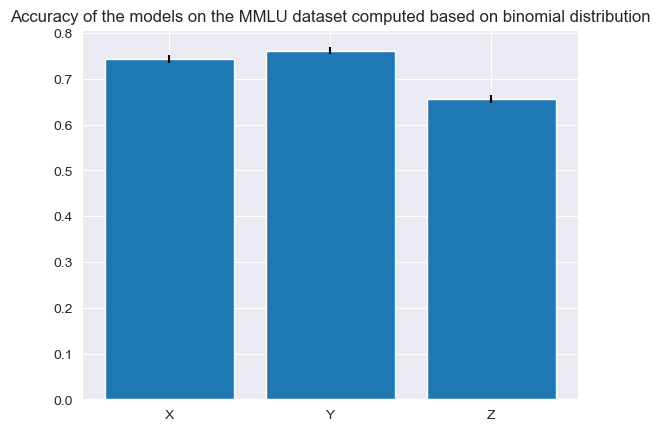

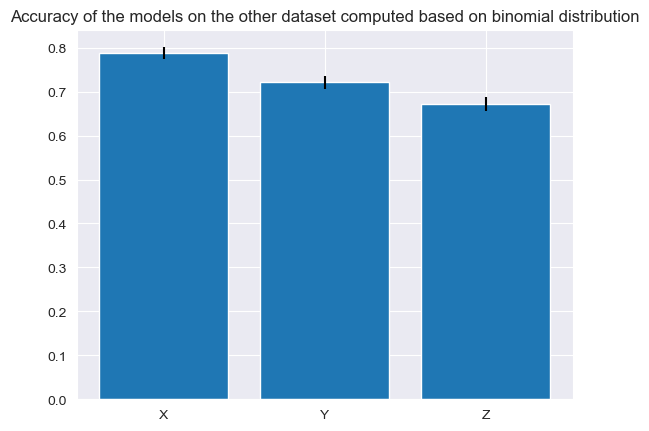

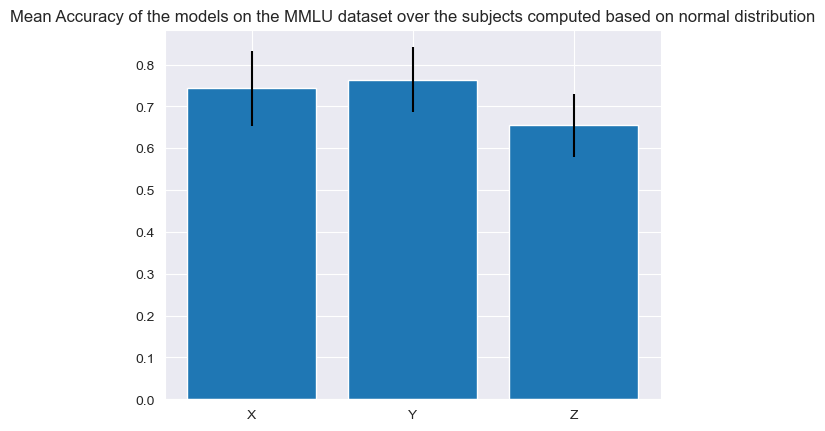

In [14]:
#B
plt.figure()
plt.title("Accuracy of the models on the MMLU dataset computed based on binomial distribution")
# Changing the confidence interval values to work with bar chart
confidence_vals = mmlu_model_accuracy_df[["95% CI Low", "95% CI High"]].sub(mmlu_model_accuracy_df["Accuracy"], axis=0).T.abs()

plt.bar(x=models, height=mmlu_model_accuracy_df["Accuracy"], yerr=confidence_vals)
plt.show()

plt.figure()
plt.title("Accuracy of the models on the other dataset computed based on binomial distribution")
# Changing the confidence interval values to work with bar chart
confidence_vals = other_model_accuracy_df[["95% CI Low", "95% CI High"]].sub(other_model_accuracy_df["Accuracy"], axis=0).T.abs()

plt.bar(x=models, height=other_model_accuracy_df["Accuracy"], yerr=confidence_vals)
plt.show()

# Visualizing the mean accuracy of the models over the subjects on the MMLU dataset
plt.figure()
plt.title("Mean Accuracy of the models on the MMLU dataset over the subjects computed based on normal distribution")
# Changing the confidence interval values to work with bar chart
confidence_vals = mmlu_described_per_subject["std"] * 1.96

plt.bar(x=models, height=mmlu_described_per_subject['mean'], yerr=confidence_vals)
plt.show()

#C

(I) Based on the computed accuracies and errors, I can only tell with certainty that the Z-model seems to perform the worst.
The models X and Y seem to provide best results, the model X on other dataset, while the model Y on the mmlu dataset.
To consider which is the best requires a bit of insight into the characteristics of the datasets. An important characteristic that the mmlu dataset has is that it contains questions from multiple subjects ranging from algebra to history, while the other dataset doesn't differentiate between question types and seems to contain only the language-based (formulated) questions.
Taking into account that these dataset characteristics, based on the results we can say that the Y-model seems to perform best over the wide range of subjects, including mathematical-based ones, while the X model seems to have particularly good results when answering language-based questions

(II) What's interesting is that the models seem to have a large difference in results between subjects (which is further shown on the figure "Distribution of model accuracies per subject on MMLU dataset seems normal-like" in the task 2.1.), where most of the subjects should be pretty similar. This would suggest that the models have been either trained on the unbalanced dataset or the level of the difficulty of the questions in the dataset is significantly varying between questions and subjects.

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

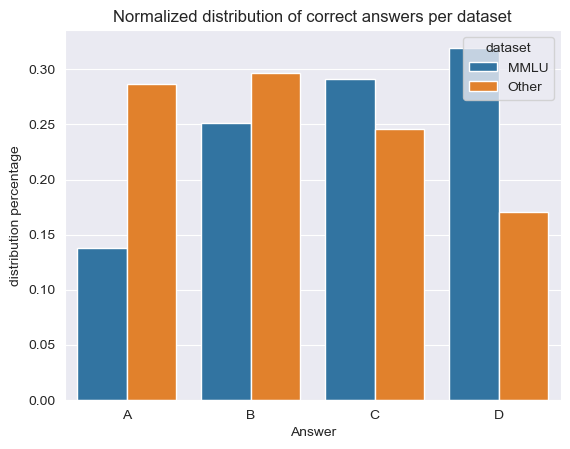

In [15]:
import seaborn as sns
#A
mmlu_distribution_of_correct_answer = (
    df_mmlu[
        ['question_id', 'answer']
    ].drop_duplicates().groupby('answer').count()
)

other_distribution_of_correct_answer = (
    df_other[
        ['question_id', 'answer']
    ].drop_duplicates().groupby('answer').count()
)

transformed_df_MMLU = pd.DataFrame(
    data=[
        list(mmlu_distribution_of_correct_answer.index),
        mmlu_distribution_of_correct_answer['question_id'],
        ['MMLU'] * mmlu_distribution_of_correct_answer['question_id'].shape[0]
    ], index = ['Answer', 'Answer Count', 'dataset']
).T

transformed_df_other = pd.DataFrame(
    data=[
        list(other_distribution_of_correct_answer.index),
        other_distribution_of_correct_answer['question_id'],
        ['Other'] * other_distribution_of_correct_answer['question_id'].shape[0]
    ], index = ['Answer', 'Answer Count', 'dataset']
).T

transformed_df = pd.concat([transformed_df_MMLU, transformed_df_other]).sort_values(by='Answer')

# Normalizing the values to achieve clearer visualization
transformed_df_MMLU['Answer Count'] /= transformed_df_MMLU['Answer Count'].sum()
transformed_df_other['Answer Count'] /= transformed_df_other['Answer Count'].sum()
normalized_df = pd.concat([transformed_df_MMLU, transformed_df_other]).sort_values(by='Answer')
normalized_df.columns = ['Answer','distribution percentage', 'dataset']

fig = plt.figure()
sns.barplot(data=normalized_df, x='Answer', y='distribution percentage', hue='dataset', axes = plt.gca())
plt.title("Normalized distribution of correct answers per dataset")
plt.show()

In [16]:
#B
from scipy.stats import chi2_contingency
mmlu_distribution = transformed_df[transformed_df['dataset']=='MMLU']['Answer Count']
other_distribution = transformed_df[transformed_df['dataset']=='Other']['Answer Count']
distributions_as_list = [list(mmlu_distribution), list(other_distribution)]
result = chi2_contingency(distributions_as_list)
print(f"statistic: {result.statistic} with p-value {result.pvalue}")
print(f"dof: {result.dof}")
print(f"expected frequencies: {result.expected_freq}")

statistic: 629.3958675644751 with p-value 4.270849602795191e-136
dof: 3
expected frequencies: [[2034.97534778 3071.76085409 3274.5772889  3314.68650922]
 [ 654.02465222  987.23914591 1052.4227111  1065.31349078]]


As is visible on the figure as well as is confirmed with certainty by the chi2 test, the two datasets have very different distributions of correct answers. Neither of the datasets seems to have uniformly distributed correct answers, even though the questions are numerous.
This may result in favoring or punishing the models that default to certain specific answer if they're uncertain about the correct answer.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

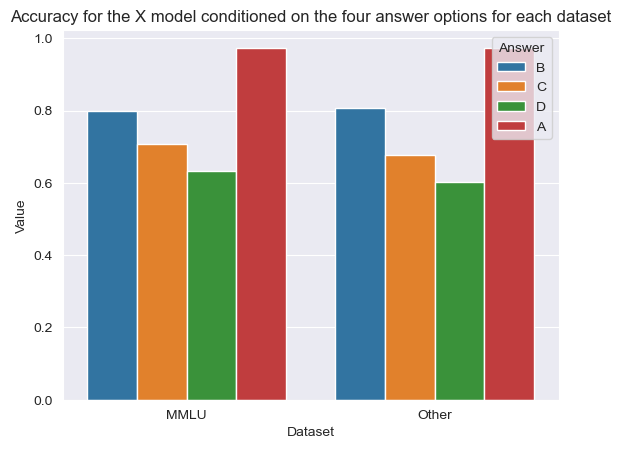

In [17]:
#A
answers = df_mmlu['answer'].unique()
mmlu_x_grouped = df_mmlu[df_mmlu["model_name"] == "X"].groupby(['answer', 'correct']).count().iloc[:,:]
other_x_grouped = df_other[df_other["model_name"] == "X"].groupby(['answer', 'correct']).count().iloc[:,:]

x_accuracy_conditioned_by_answer = pd.DataFrame(np.zeros((len(answers), 2)), index=answers, columns=["MMLU", "Other"])
for answer in answers:
    correctly_answered = mmlu_x_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = mmlu_x_grouped.loc[(answer, False)].iloc[0]
    x_accuracy_conditioned_by_answer.loc[answer, "MMLU"] = correctly_answered / (correctly_answered + incorrectly_answered)
    correctly_answered = other_x_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = other_x_grouped.loc[(answer, False)].iloc[0]
    x_accuracy_conditioned_by_answer.loc[answer, "Other"] = correctly_answered / (correctly_answered + incorrectly_answered)

x_accuracy_conditioned_by_answer_for_seaborne = pd.DataFrame(np.zeros((0, 3)), columns=["Answer", "Dataset", "Value"])

for index in x_accuracy_conditioned_by_answer.index:
    for column in x_accuracy_conditioned_by_answer.columns:
        x_accuracy_conditioned_by_answer_for_seaborne = pd.concat(
            [
                x_accuracy_conditioned_by_answer_for_seaborne,
                pd.DataFrame([[index, column, x_accuracy_conditioned_by_answer.loc[index, column]]], columns=x_accuracy_conditioned_by_answer_for_seaborne.columns)
            ]
        )

sns.barplot(x_accuracy_conditioned_by_answer_for_seaborne, x="Dataset", y="Value", hue="Answer")
plt.title("Accuracy for the X model conditioned on the four answer options for each dataset")
plt.show()

In [18]:
import random
from scipy.stats import ttest_ind

#B
# As in order to use the t-test the data needs to be normally distributed, sampling will be used to generate data with correct characteristic
sampled_count = 100
number_of_samples = 10000

only_x_mmlu = df_mmlu[df_mmlu["model_name"] == "X"]
only_x_a_mmlu = only_x_mmlu[only_x_mmlu["answer"] == "A"]
correct_as_numerical = [1 if val else 0 for val in (only_x_a_mmlu['correct'] == True)]

mmlu_sampling_results = [0] * number_of_samples

for i in range(number_of_samples):
    sampled = random.sample(correct_as_numerical, sampled_count)
    mmlu_sampling_results[i] = sum(sampled)/sampled_count

only_x_other = df_other[df_other["model_name"] == "X"]
only_x_a_other = only_x_other[only_x_other["answer"] == "A"]
correct_as_numerical = [1 if val else 0 for val in (only_x_a_other['correct'] == True)]

other_sampling_results = [0] * number_of_samples

for i in range(number_of_samples):
    sampled = random.sample(correct_as_numerical, sampled_count)
    other_sampling_results[i] = sum(sampled)/sampled_count

t_test_result = ttest_ind(mmlu_sampling_results, other_sampling_results, equal_var=False)
print(f"statistic: {t_test_result.statistic} with p-value {t_test_result.pvalue}")
print(f"confidence interval: {t_test_result.confidence_interval(confidence_level=0.95)}")

statistic: -5.8495473393496065 with p-value 5.00609668826993e-09
confidence interval: ConfidenceInterval(low=-0.00171825159606512, high=-0.000855748403934956)


Given that the null hypothesis was that the results of the model X given the correct answer "A" were similarly distributed on both datasets.
The T-test has shown that the results obtained by the model given the correct answer "A" are not distributed similarly on the given datasets. This would suggest that the sets of the questions with the correct answer "A" present in the datasets are not similar (be it in subject, or difficulty or bias)

In [19]:
##C

sampled_count = 100
number_of_samples = 1000

print("MMLU dataset")
only_x_mmlu = df_mmlu[df_mmlu["model_name"] == "X"]
only_x_a_mmlu = only_x_mmlu[only_x_mmlu["answer"] == "A"]
correct_as_numerical = [1 if val else 0 for val in (only_x_a_mmlu['correct'] == True)]

mmlu_A_sampling_results = [0] * number_of_samples

for i in range(number_of_samples):
    sampled = random.sample(correct_as_numerical, sampled_count)
    mmlu_A_sampling_results[i] = sum(sampled)/sampled_count

only_x_mmlu = df_mmlu[df_mmlu["model_name"] == "X"]
tmp_is_C = only_x_mmlu["answer"] == "C"
tmp_is_D = only_x_mmlu["answer"] == "D"
only_x_cd_mmlu = only_x_mmlu[[True if c or d else False for c, d in zip(tmp_is_C, tmp_is_D)]]
correct_as_numerical = [1 if val else 0 for val in (only_x_cd_mmlu['correct'] == True)]

mmlu_CD_sampling_results = [0] * number_of_samples

for i in range(number_of_samples):
    sampled = random.sample(correct_as_numerical, sampled_count)
    mmlu_CD_sampling_results[i] = sum(sampled)/sampled_count

t_test_result = ttest_ind(mmlu_A_sampling_results, mmlu_CD_sampling_results, equal_var=False)
print(f"statistic: {t_test_result.statistic} with p-value {t_test_result.pvalue}")
print(f"confidence interval: {t_test_result.confidence_interval(confidence_level=0.95)}")

# Other dataset

print("Other dataset")
only_x_other = df_other[df_other["model_name"] == "X"]
only_x_a_other = only_x_other[only_x_other["answer"] == "A"]
correct_as_numerical = [1 if val else 0 for val in (only_x_a_other['correct'] == True)]

other_A_sampling_results = [0] * number_of_samples

for i in range(number_of_samples):
    sampled = random.sample(correct_as_numerical, sampled_count)
    other_A_sampling_results[i] = sum(sampled)/sampled_count

only_x_other = df_other[df_other["model_name"] == "X"]
tmp_is_C = only_x_other["answer"] == "C"
tmp_is_D = only_x_other["answer"] == "D"
only_x_cd_other = only_x_other[[True if c or d else False for c, d in zip(tmp_is_C, tmp_is_D)]]
correct_as_numerical = [1 if val else 0 for val in (only_x_cd_other['correct'] == True)]

other_CD_sampling_results = [0] * number_of_samples

for i in range(number_of_samples):
    sampled = random.sample(correct_as_numerical, sampled_count)
    other_CD_sampling_results[i] = sum(sampled)/sampled_count

t_test_result = ttest_ind(other_A_sampling_results, other_CD_sampling_results, equal_var=False)
print(f"statistic: {t_test_result.statistic} with p-value {t_test_result.pvalue}")
print(f"confidence interval: {t_test_result.confidence_interval(confidence_level=0.95)}")

MMLU dataset
statistic: 195.56118342428113 with p-value 0.0
confidence interval: ConfidenceInterval(low=0.29947516376382843, high=0.3055448362361719)
Other dataset
statistic: 216.49677110065295 with p-value 0.0
confidence interval: ConfidenceInterval(low=0.32467090905392504, high=0.33060909094607527)


(I) MMLU
Given that the null hypothesis was that on the MMLU dataset the results of the model X given the correct answer "A" were similarly distributed as results of the model X given the correct answer "C" or "D".
The T-test has shown that on the MMLU dataset the results obtained by the model given the correct answer "A" are not distributed similarly to the results obtained by the model given the correct answer "C" or "D".

(II) OTHER
Given that the null hypothesis was that on the OTHER dataset the results of the model X given the correct answer "A" were similarly distributed as results of the model X given the correct answer "C" or "D".
The T-test has shown that on the OTHER dataset the results obtained by the model given the correct answer "A" are not distributed similarly to the results obtained by the model given the correct answer "C" or "D".

This would suggest that the compared sets of questions are not similar (be it in subject, or difficulty or bias).

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [20]:
#A
answers = df_mmlu['answer'].unique()
mmlu_x_grouped = df_mmlu[df_mmlu["model_name"] == "X"].groupby(['answer', 'correct']).count().iloc[:,:]
other_x_grouped = df_other[df_other["model_name"] == "X"].groupby(['answer', 'correct']).count().iloc[:,:]

x_accuracy_conditioned_by_answer = pd.DataFrame(np.zeros((len(answers), 2)), index=answers, columns=["MMLU", "Other"])
for answer in answers:
    correctly_answered = mmlu_x_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = mmlu_x_grouped.loc[(answer, False)].iloc[0]
    x_accuracy_conditioned_by_answer.loc[answer, "MMLU"] = correctly_answered / (correctly_answered + incorrectly_answered)
    correctly_answered = other_x_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = other_x_grouped.loc[(answer, False)].iloc[0]
    x_accuracy_conditioned_by_answer.loc[answer, "Other"] = correctly_answered / (correctly_answered + incorrectly_answered)

print(f"Accuracies for the X LM:\n{x_accuracy_conditioned_by_answer}")

mmlu_y_grouped = df_mmlu[df_mmlu["model_name"] == "Y"].groupby(['answer', 'correct']).count().iloc[:,:]
other_y_grouped = df_other[df_other["model_name"] == "Y"].groupby(['answer', 'correct']).count().iloc[:,:]

y_accuracy_conditioned_by_answer = pd.DataFrame(np.zeros((len(answers), 2)), index=answers, columns=["MMLU", "Other"])
for answer in answers:
    correctly_answered = mmlu_y_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = mmlu_y_grouped.loc[(answer, False)].iloc[0]
    y_accuracy_conditioned_by_answer.loc[answer, "MMLU"] = correctly_answered / (correctly_answered + incorrectly_answered)
    correctly_answered = other_y_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = other_y_grouped.loc[(answer, False)].iloc[0]
    y_accuracy_conditioned_by_answer.loc[answer, "Other"] = correctly_answered / (correctly_answered + incorrectly_answered)

print(f"Accuracies for the Y LM:\n{y_accuracy_conditioned_by_answer}")

mmlu_z_grouped = df_mmlu[df_mmlu["model_name"] == "Z"].groupby(['answer', 'correct']).count().iloc[:,:]
other_z_grouped = df_other[df_other["model_name"] == "Z"].groupby(['answer', 'correct']).count().iloc[:,:]

z_accuracy_conditioned_by_answer = pd.DataFrame(np.zeros((len(answers), 2)), index=answers, columns=["MMLU", "Other"])
for answer in answers:
    correctly_answered = mmlu_z_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = mmlu_z_grouped.loc[(answer, False)].iloc[0]
    z_accuracy_conditioned_by_answer.loc[answer, "MMLU"] = correctly_answered / (correctly_answered + incorrectly_answered)
    correctly_answered = other_z_grouped.loc[(answer, True)].iloc[0]
    incorrectly_answered = other_z_grouped.loc[(answer, False)].iloc[0]
    z_accuracy_conditioned_by_answer.loc[answer, "Other"] = correctly_answered / (correctly_answered + incorrectly_answered)

print(f"Accuracies for the Z LM:\n{z_accuracy_conditioned_by_answer}")

Accuracies for the X LM:
       MMLU     Other
B  0.799185  0.806452
C  0.707905  0.676407
D  0.633592  0.603744
A  0.972688  0.974026
Accuracies for the Y LM:
       MMLU     Other
B  0.688073  0.663978
C  0.733470  0.762987
D  0.904252  0.920437
A  0.623836  0.625232
Accuracies for the Z LM:
       MMLU     Other
B  0.641182  0.667563
C  0.669115  0.662338
D  0.661139  0.677067
A  0.643079  0.680891


B. /Discuss:/
Interestingly, for models "X" and "Y" the accuracies of the models conditioned on the correct answer vary significantly based on the correct answer. Both models have an answer when conditioned on which the accuracy is over 90% and for the other answers the accuracy is in the range of 60%-80%.
These results show a level of bias towards answers within the models, which comes most likely from bias within the dataset these models were trained on. As the models are considered to be used within the education system, presence of such bias is undesirable, as it puts doubt on the capability of models to assess the correctness of the results and possibly provide an explanation to the reasoning process.

In this sense the model "Z" which doesn't show the presence of such bias, is far more likely to produce predictable results and explanations, even though it would be less accurate than the other models.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?


B. /Discuss:/

The obtained results don't provide the conclusive proof for the bias in the models as they provide proof only for bias in either the data or the models.
As such if the results were to be reproduced given eliminated bias in the dataset, this would be a conclusive proof for the bias in the models. Geronimo aims to determine the source of bias in the results using this method.


### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

   Accuracy  Test-retest-metric
X  0.743588            0.588406
Y  0.761542            0.571648
Z  0.655951            0.441604


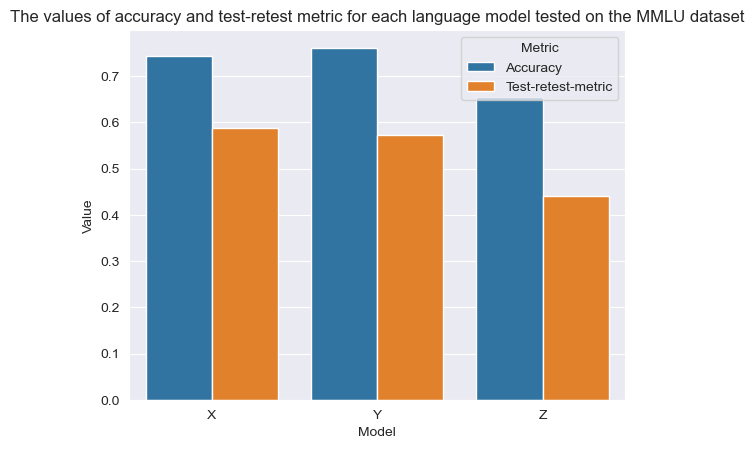

In [21]:
#fancy code
df_mmlu_shuffled = pd.read_csv('data/task_2_5/lm_scores_mmlu_shuffle.csv')
M = 1

test_retest_metric_and_accuracy = (
    pd.DataFrame(
        pd.concat([
            mmlu_model_accuracy_df["Accuracy"],
            pd.DataFrame(np.zeros(mmlu_model_accuracy_df["Accuracy"].shape))
        ]),
        index = mmlu_model_accuracy_df.index,
        columns = ["Accuracy", "Test-retest-metric"]
    )
)

# X model

only_x_mmlu = df_mmlu[df_mmlu["model_name"] == "X"].sort_values(by='question_id', ascending=False)
only_x_mmlu_shuffled = df_mmlu_shuffled[df_mmlu_shuffled["model_name"] == "X"].sort_values(by='question_id', ascending=False)

x_original_correct_list = only_x_mmlu['correct'] == True
x_shuffled_correct_list = only_x_mmlu_shuffled['correct'] == True
x_multiplied_lists = [
    1 if correct and shuffled else 0
    for correct, shuffled in zip(x_original_correct_list, x_shuffled_correct_list)
]

test_retest_metric_and_accuracy.loc["X", "Test-retest-metric"] = sum(x_multiplied_lists) / len(x_multiplied_lists)

# Y model

only_y_mmlu = df_mmlu[df_mmlu["model_name"] == "Y"].sort_values(by='question_id', ascending=False)
only_y_mmlu_shuffled = df_mmlu_shuffled[df_mmlu_shuffled["model_name"] == "Y"].sort_values(by='question_id', ascending=False)

y_original_correct_list = only_y_mmlu['correct'] == True
y_shuffled_correct_list = only_y_mmlu_shuffled['correct'] == True
y_multiplied_lists = [
    1 if correct and shuffled else 0
    for correct, shuffled in zip(y_original_correct_list, y_shuffled_correct_list)
]

test_retest_metric_and_accuracy.loc["Y", "Test-retest-metric"] = sum(y_multiplied_lists) / len(y_multiplied_lists)

# Z model

only_z_mmlu = df_mmlu[df_mmlu["model_name"] == "Z"].sort_values(by='question_id', ascending=False)
only_z_mmlu_shuffled = df_mmlu_shuffled[df_mmlu_shuffled["model_name"] == "Z"].sort_values(by='question_id', ascending=False)

z_original_correct_list = only_z_mmlu['correct'] == True
z_shuffled_correct_list = only_z_mmlu_shuffled['correct'] == True
z_multiplied_lists = [
    1 if correct and shuffled else 0
    for correct, shuffled in zip(z_original_correct_list, z_shuffled_correct_list)
]

test_retest_metric_and_accuracy.loc["Z", "Test-retest-metric"] = sum(z_multiplied_lists) / len(z_multiplied_lists)

print(test_retest_metric_and_accuracy)

# Reshaping the array to a format accepted by seaborne
indexes = test_retest_metric_and_accuracy.index
columns = test_retest_metric_and_accuracy.columns
reshaped_test_retest_and_accuracy = pd.DataFrame(np.zeros((0, 3)), columns=["Model", "Metric", "Value"])

for index in test_retest_metric_and_accuracy.index:
    for column in test_retest_metric_and_accuracy.columns:
        reshaped_test_retest_and_accuracy = pd.concat(
            [
                reshaped_test_retest_and_accuracy,
                pd.DataFrame([[index, column, test_retest_metric_and_accuracy.loc[index, column]]], columns=reshaped_test_retest_and_accuracy.columns)
            ]
        )

sns.barplot(reshaped_test_retest_and_accuracy, x="Model", y="Value", hue="Metric")
plt.title("The values of accuracy and test-retest metric for each language model tested on the MMLU dataset")
plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

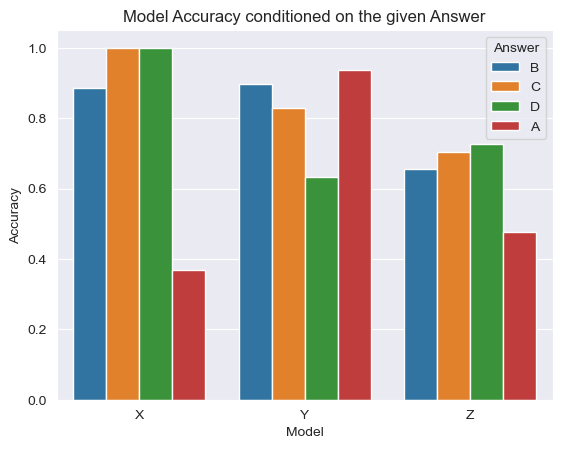

In [22]:
#A
models = df_mmlu["model_name"].unique()
answers = df_mmlu['result'].unique()
result = pd.DataFrame(np.zeros((0, 3)), columns=["Model", "Answer", "Accuracy"])

for model in models:
    only_model = df_mmlu[df_mmlu["model_name"] == model]
    grouped = only_model.groupby(['result', 'correct']).count()
    for answer in answers:
        try:
            correct = grouped.loc[(answer, True)].iloc[0]
        except Exception:
            correct = 0
        try:
            incorrect = grouped.loc[(answer, False)].iloc[0]
        except Exception:
            incorrect = 0

        result = pd.concat(
            [
                result,
                pd.DataFrame(
                    [[model, answer, correct / (correct + incorrect)]],
                    columns=["Model", "Answer", "Accuracy"]
                )
            ]
        )

sns.barplot(result, x="Model", y="Accuracy", hue="Answer")
plt.title("Model Accuracy conditioned on the given Answer")
plt.show()


B. /Discuss:/
The accuracies conditioned on the given answer vary significantly for each model.
Each model seems to have a single answer with the accuracy far below accuracies for the other answers. The model "X" has this property most visible, for the answers "B", "C", "D" it achieves nearly perfect accuracy, while for the answer "A" its accuracy is the worst across all the accuracies for all the tested models.
The model Z seems to not suffer from this issue as much.

A possible explanation for these results is that the models have an internal bias towards a certain answer and default to it if they're uncertain about the correct answer. This default answer is likely an answer overly present within the training dataset. Having identified this default answer we should be able to deduce when those models are confident in their answers, i.e. "C" and "D" answers for the X model and when they're guessing "A" answer for the "X" model.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [23]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

[15, 309, 9764, 290, 9882, 395, 290, 4335, 3259, 15369, 12646, 16, 309, 9024, 275, 314, 350, 16, 11, 220, 17, 11, 220, 20, 11, 220, 19, 4898, 17, 11, 220, 18, 8, 306, 336, 62, 20, 887, 9764, 290, 575, 4908, 17, 309, 9764, 722, 42274, 306, 290, 26832, 73104, 3259, 293, 4908, 18, 309, 32541, 220, 16, 1022, 355, 12332, 3566, 328, 261, 2893, 101885, 126508, 12646, 19, 309, 9764, 290, 1888, 328, 290, 4335, 1823, 174033, 306, 260, 4908, 15880, 2550, 35702, 10165, 2991, 271, 4614, 853, 1339, 261, 11082, 5184, 328, 20159, 9747, 4908, 10165, 3150, 257, 2514, 15904, 2242, 30633, 30578, 21446, 3354, 261, 6517, 4908, 10165, 3255, 257, 623, 128531, 2914, 72557, 784, 2453, 4748, 1118, 293, 4908, 10165, 1723, 271, 16344, 316, 290, 18938, 12839, 30022, 11, 1218, 118263, 4908, 10165, 4987, 257, 623, 2269, 262, 328, 156923, 22653, 316, 1118, 328, 325, 4908, 864, 25, 4928, 11, 32926, 25, 220, 10165, 4689, 11, 29770, 25, 2817]


<Axes: ylabel='Count'>

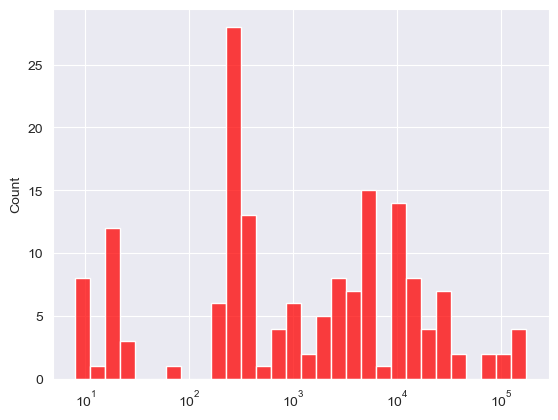

In [24]:
#A 
df_mmlu1= pd.read_csv('data/task_1/mmlu_data/test.csv')
tokenizedQuestions = (tokenize_text(df_mmlu1['question']))
print(tokenizedQuestions)

sns.histplot(tokenizedQuestions, bins=30, color='red', log_scale=True)

<Axes: ylabel='Count'>

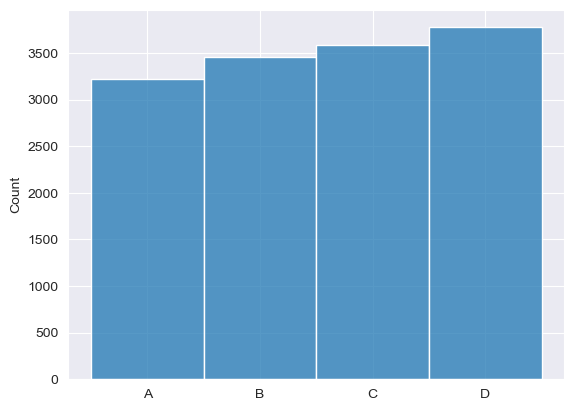

In [25]:
#B

list_plotA = (df_mmlu1['answer'] == "A").tolist()
count_trueA = 0
list_plotB = (df_mmlu1['answer'] == "B").tolist()
count_trueB = 0
list_plotC = (df_mmlu1['answer'] == "C").tolist()
count_trueC = 0
list_plotD = (df_mmlu1['answer'] == "D").tolist()
count_trueD = 0
countList = []

for i in range(len(list_plotA)):
    if list_plotA[i]:
        count_trueA += 1
        countList.append("A")
for i in range(len(list_plotB)):
    if list_plotB[i]:
        count_trueB += 1
        countList.append("B")
for i in range(len(list_plotC)):
    if list_plotC[i]:
        count_trueC += 1
        countList.append("C")
for i in range(len(list_plotD)):
    if list_plotD[i]:
        count_trueD += 1
        countList.append("D")

sns.histplot(countList)

[3222, 3462, 3582, 3776]
[5442, 3540, 3684, 3827]


<function matplotlib.pyplot.show(close=None, block=None)>

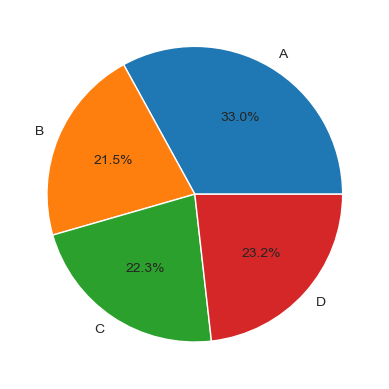

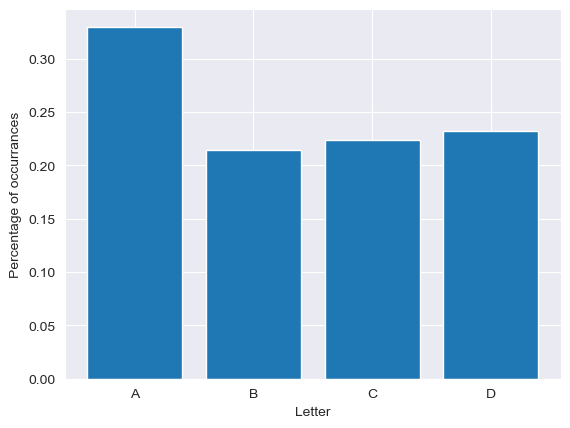

In [26]:
#C
tokenizedLetters = [tokenize_text("A")[0], tokenize_text("B")[0], tokenize_text("C")[0], tokenize_text("D")[0]]
tokenizedLetterCount = [0,0,0,0]


for sentnece in tokenize_text(df_mmlu1['answer'].tolist()):
    for i in range(4):
        if tokenizedLetters[i] == sentnece:
            tokenizedLetterCount[i] += 1
print(tokenizedLetterCount)
for sentnece in tokenize_text(df_mmlu1['question'].tolist()):
    for i in range(4):
        if tokenizedLetters[i] == sentnece:
            tokenizedLetterCount[i] += 1
print(tokenizedLetterCount)

plot = []
sumTotal = tokenizedLetterCount[0] + tokenizedLetterCount[1] + tokenizedLetterCount[2] + tokenizedLetterCount[3]
for i in range(tokenizedLetterCount[0]):
    plot.append("A")
for i in range(tokenizedLetterCount[1]):
    plot.append("B")
for i in range(tokenizedLetterCount[2]):
    plot.append("C")
for i in range(tokenizedLetterCount[3]):
    plot.append("D")

values = [tokenizedLetterCount[0] / sumTotal, tokenizedLetterCount[1] / sumTotal, tokenizedLetterCount[2] / sumTotal, tokenizedLetterCount[3] / sumTotal]
names = ["A", "B", "C", "D"]
plt.figure()
plt.pie(values, labels=names, autopct='%1.1f%%')
plt.show
plt.figure()
plt.bar(names, values, )
plt.xlabel('Letter')
plt.ylabel('Percentage of occurrances')
plt.show


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


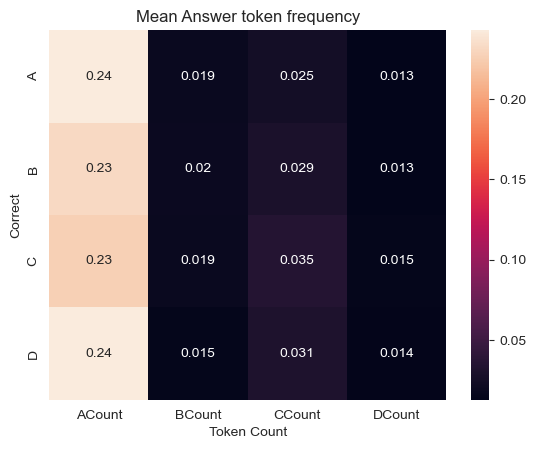

In [27]:
#A 


def count_letter_tokens(tokens, letter_tokens):
    result = [0,0,0,0]
    for token in tokens:
        for i in range(4):
            if token == letter_tokens[i]:
                result[i] += 1

    return result


tokenCounts = [[],[],[],[]]
allTokens = []
letters = ['A', 'B', 'C', 'D']

for _, row in df_mmlu1.iterrows():

    combTokens = tokenize_text(row['question'])
    for letter in letters:
        tokenized = tokenize_text(row[letter])
        for token in tokenized:
            combTokens.append(token)

    token_counts = count_letter_tokens(combTokens, tokenizedLetters)

    for token in range(4):
        tokenCounts[token].append(token_counts[token])

    allTokens.append(len(combTokens))


data = {"ACount": tokenCounts[0], "BCount": tokenCounts[1], "CCount": tokenCounts[2], "DCount": tokenCounts[3], "answers": df_mmlu1["answer"].tolist()}
df_data = pd.DataFrame(data)

means = df_data.groupby("answers")[["ACount", "BCount", "CCount", "DCount"]].mean()


plt.figure()
sns.heatmap(means, annot=True)
plt.title("Mean Answer token frequency")
plt.ylabel("Correct")
plt.xlabel("Token Count")
plt.show()

B. /Discuss:/

From the heatmap, it seems that the mean frequency of tokens B, C, and D are rather low, while A is very high. 
Additionally, the Token count of A is considerably larger than all of the other three combined, no matter what the correct answer was.
Finally, while the mean frequency across B, C, and D was consistently low, there is an area in the middle of C where it is slightly higher; It is also this exact area where the token count is highest for that letter.

From this, we can assume that the hypothesis of mean token frequency of A, B, C, and D influencing answers is correct. There does seem to be a noticeable correlation between the two.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

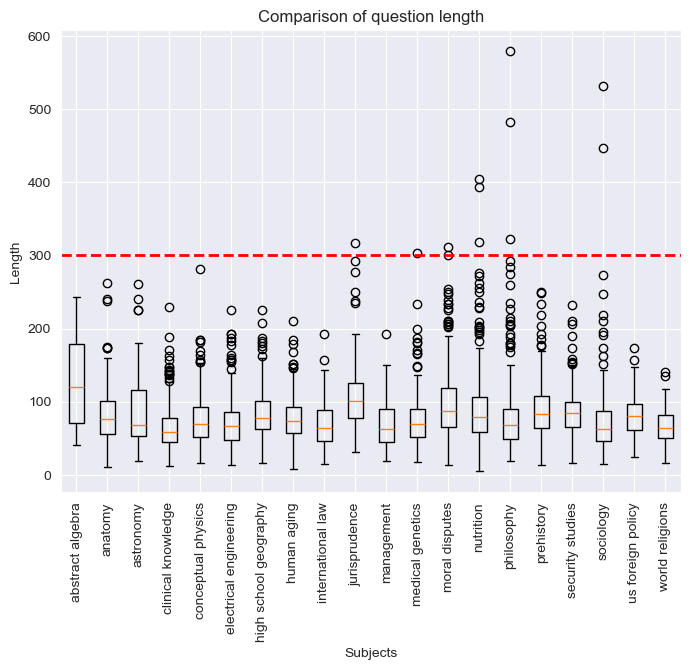

['abstract algebra', 'anatomy', 'astronomy', 'clinical knowledge', 'conceptual physics', 'electrical engineering', 'high school geography', 'human aging', 'international law', 'jurisprudence', 'management', 'medical genetics', 'moral disputes', 'nutrition', 'philosophy', 'prehistory', 'security studies', 'sociology', 'us foreign policy', 'world religions']


In [28]:
#A

"""
we are going to check each subject in the lm_scores_mmlu.csv dataset and see which subjects have questions below
300 tokens 99% of the time (the LLM is very likely to be unable to answer questions above 300 tokens)

The reason why we chose to do 99% was for precision, but also because for values that are lower (like 95%) some
subjects have too many questions above 300 tokens, which is something we dont want
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_mmlu1= pd.read_csv('data/task_1/mmlu_data/test.csv')
subjects = df_mmlu1["subject"].unique()
Nsubjects = subjects
counts = []


for y in range(len(subjects)):
    data = df_mmlu1[df_mmlu1['subject'] == subjects[y]]['question'].reindex()

    within_tolerance = True

    data_count = []
    count = 0
    for x in range(len(data)):
        dataPOINt = len(data.iloc[x])
        if dataPOINt > 300:
            count += 1
        if count > len(data) * 0.01:
            within_tolerance = False
        data_count.append( dataPOINt )

    if within_tolerance:
        counts.append(data_count)
    else:
        temp = []
        for j in range(len(Nsubjects)):
            if Nsubjects[j] != subjects[y]:
                temp.append(Nsubjects[j])
        Nsubjects = temp



plt.figure(figsize=(8, 6))
plt.boxplot(counts)
plt.title('Comparison of question length')
plt.xlabel('Subjects')
plt.ylabel('Length')
plt.axhline(y=300, color='r', linestyle='--', linewidth=2)
plt.xticks(range(1, len(Nsubjects) + 1), Nsubjects, rotation=90)
plt.show()

print(Nsubjects)

    

B. /Discuss:/

In order to minimize the time spent for the LLM to process, the government will want to use the Turbo model as often as posssible. As such, for any subjects that have at least a 99% rate of using <300 tokens, it only makes sense to use the Turbo model. As stated in the code above, anything below 99% would risk too many circumstances where the model is unable to perform to standard, if at all. 
Based on this, the graph above shows that Abstract Algebra, Anatomy, Astronomy, Clinical Knowledge, Conceptual Physics, Electrical Engineering, Highschool Geography, Human Aging, International Law, Management, Prehistory, Security Studies, US foreign policy, and World Religions all fall within this boundary. For these subjects, it could be considered wise for the government to employ the Turbo model, since based on the current data it is highly unlikely that any instance in these subjects will exceed the 300 token limit. 
Meanwhile, for Jurisprudence, Medical Genetics, Moral Disputes, Nutrition, Philosophy, and Sociology, it is recommended to use more standard models that can handle higher token counts.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1. Ensuring that the datasets are more balanced so less data is wasted and more insights can be gathered about these subjects that have less questions. 

2. Using turbo in the subjects talked about in 3.3 (its printed above) to take advantage of the better performance in these subjects, meanwhile using model X for linguistic tasks, while Y for the rest as it seems to perform best over a wide range of different subjects.

3. During testing (and training if it could be influenced) the questions should have more balanced distribution across the correct answers (A, B, C, D) to ensure that there is no bias that be seen in the task 2.7.

4. Although the models X and Y are the best performing, they should be applied in a way that would provide a justification/reasoning for their answers, in order to ensure the assessment of the correctness of the answer.